In [1]:
import os

from xcube.core.store import new_data_store
from xcube.core.maskset import MaskSet
import matplotlib.pyplot as plt
import datetime
import numpy as np
import xarray as xr
import utils
import constants
import matplotlib.pyplot as plt

In [2]:
# greate s3 data store
s3_store = new_data_store(
    "s3",
    root=os.environ["S3_USER_STORAGE_BUCKET"],
    max_depth=10,
    storage_options=dict(
        anon=False,
        key=os.environ["S3_USER_STORAGE_KEY"],
        secret=os.environ["S3_USER_STORAGE_SECRET"],
    ),
)

In [11]:
s3_store.delete_data("cubes/temp/science/0.1.0/020_2017.zarr")

In [12]:
print(s3_store.list_data_ids())

['cubes/aux/era5/2016_11.zarr', 'cubes/aux/era5/2016_12.zarr', 'cubes/aux/era5/2017_01.zarr', 'cubes/aux/era5/2017_02.zarr', 'cubes/aux/era5/2017_03.zarr', 'cubes/aux/era5/2017_04.zarr', 'cubes/aux/era5/2017_05.zarr', 'cubes/aux/era5/2017_06.zarr', 'cubes/aux/era5/2017_07.zarr', 'cubes/aux/era5/2017_08.zarr', 'cubes/aux/era5/2017_09.zarr', 'cubes/aux/era5/2017_10.zarr', 'cubes/aux/era5/2017_11.zarr', 'cubes/aux/era5/2017_12.zarr', 'cubes/aux/era5/2018_01.zarr', 'cubes/aux/era5/2018_02.zarr', 'cubes/aux/era5/2018_03.zarr', 'cubes/aux/era5/2018_04.zarr', 'cubes/aux/era5/2018_05.zarr', 'cubes/aux/era5/2018_06.zarr', 'cubes/aux/era5/2018_07.zarr', 'cubes/aux/era5/2018_08.zarr', 'cubes/aux/era5/2018_09.zarr', 'cubes/aux/era5/2018_10.zarr', 'cubes/aux/era5/2018_11.zarr', 'cubes/aux/era5/2018_12.zarr', 'cubes/aux/era5/2019_01.zarr', 'cubes/aux/era5/2019_02.zarr', 'cubes/aux/era5/2019_03.zarr', 'cubes/aux/era5/2019_04.zarr', 'cubes/aux/era5/2019_05.zarr', 'cubes/aux/era5/2019_06.zarr', 'cubes/

---
## Plot training data cube

In [4]:
ds = s3_store.open_data("cubes/training/0.0.1/000100.zarr")
ds

<xarray.Dataset> Size: 118MB
Dimensions:     (band: 12, time: 144, y: 90, x: 90)
Coordinates:
  * band        (band) <U3 144B 'B01' 'B02' 'B03' 'B04' ... 'B09' 'B11' 'B12'
  * time        (time) datetime64[ns] 1kB 2019-10-26T10:10:29.024000 ... 2020...
  * x           (x) float64 720B 7.189e+05 7.189e+05 ... 7.198e+05 7.198e+05
  * y           (y) float64 720B 4.838e+06 4.838e+06 ... 4.838e+06 4.838e+06
Data variables:
    cloud_mask  (time, y, x) uint8 1MB dask.array<chunksize=(20, 90, 90), meta=np.ndarray>
    s2l2a       (band, time, y, x) float64 112MB dask.array<chunksize=(12, 20, 90, 90), meta=np.ndarray>
    scl         (time, y, x) float32 5MB dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
Attributes: (12/33)
    acknowledgment:               DeepFeatures project
    affine_transform:             [10.0, 0.0, 718920.0, 0.0, -10.0, 4838430.0...
    bbox_utm:                     [718920.0, 4837530, 719820.0, 4838430]
    bbox_wgs84:                   [11.714985349234167, 43.658531856015315, 11...
    center_utm:                   [4837986.1902633775, 719377.1029690022]
    center_wgs84:                 [43.6625, 11.7208333333333]
    ...                           ...
    site_id:                      100
    time_range_end:               2020-10-26
    time_range_start:             2019-10-26
    utm_zone:                     32T
    version:                      0.0.1
    xcube_stac_attrs:             {'data_url': 'https://documentation.dataspa...

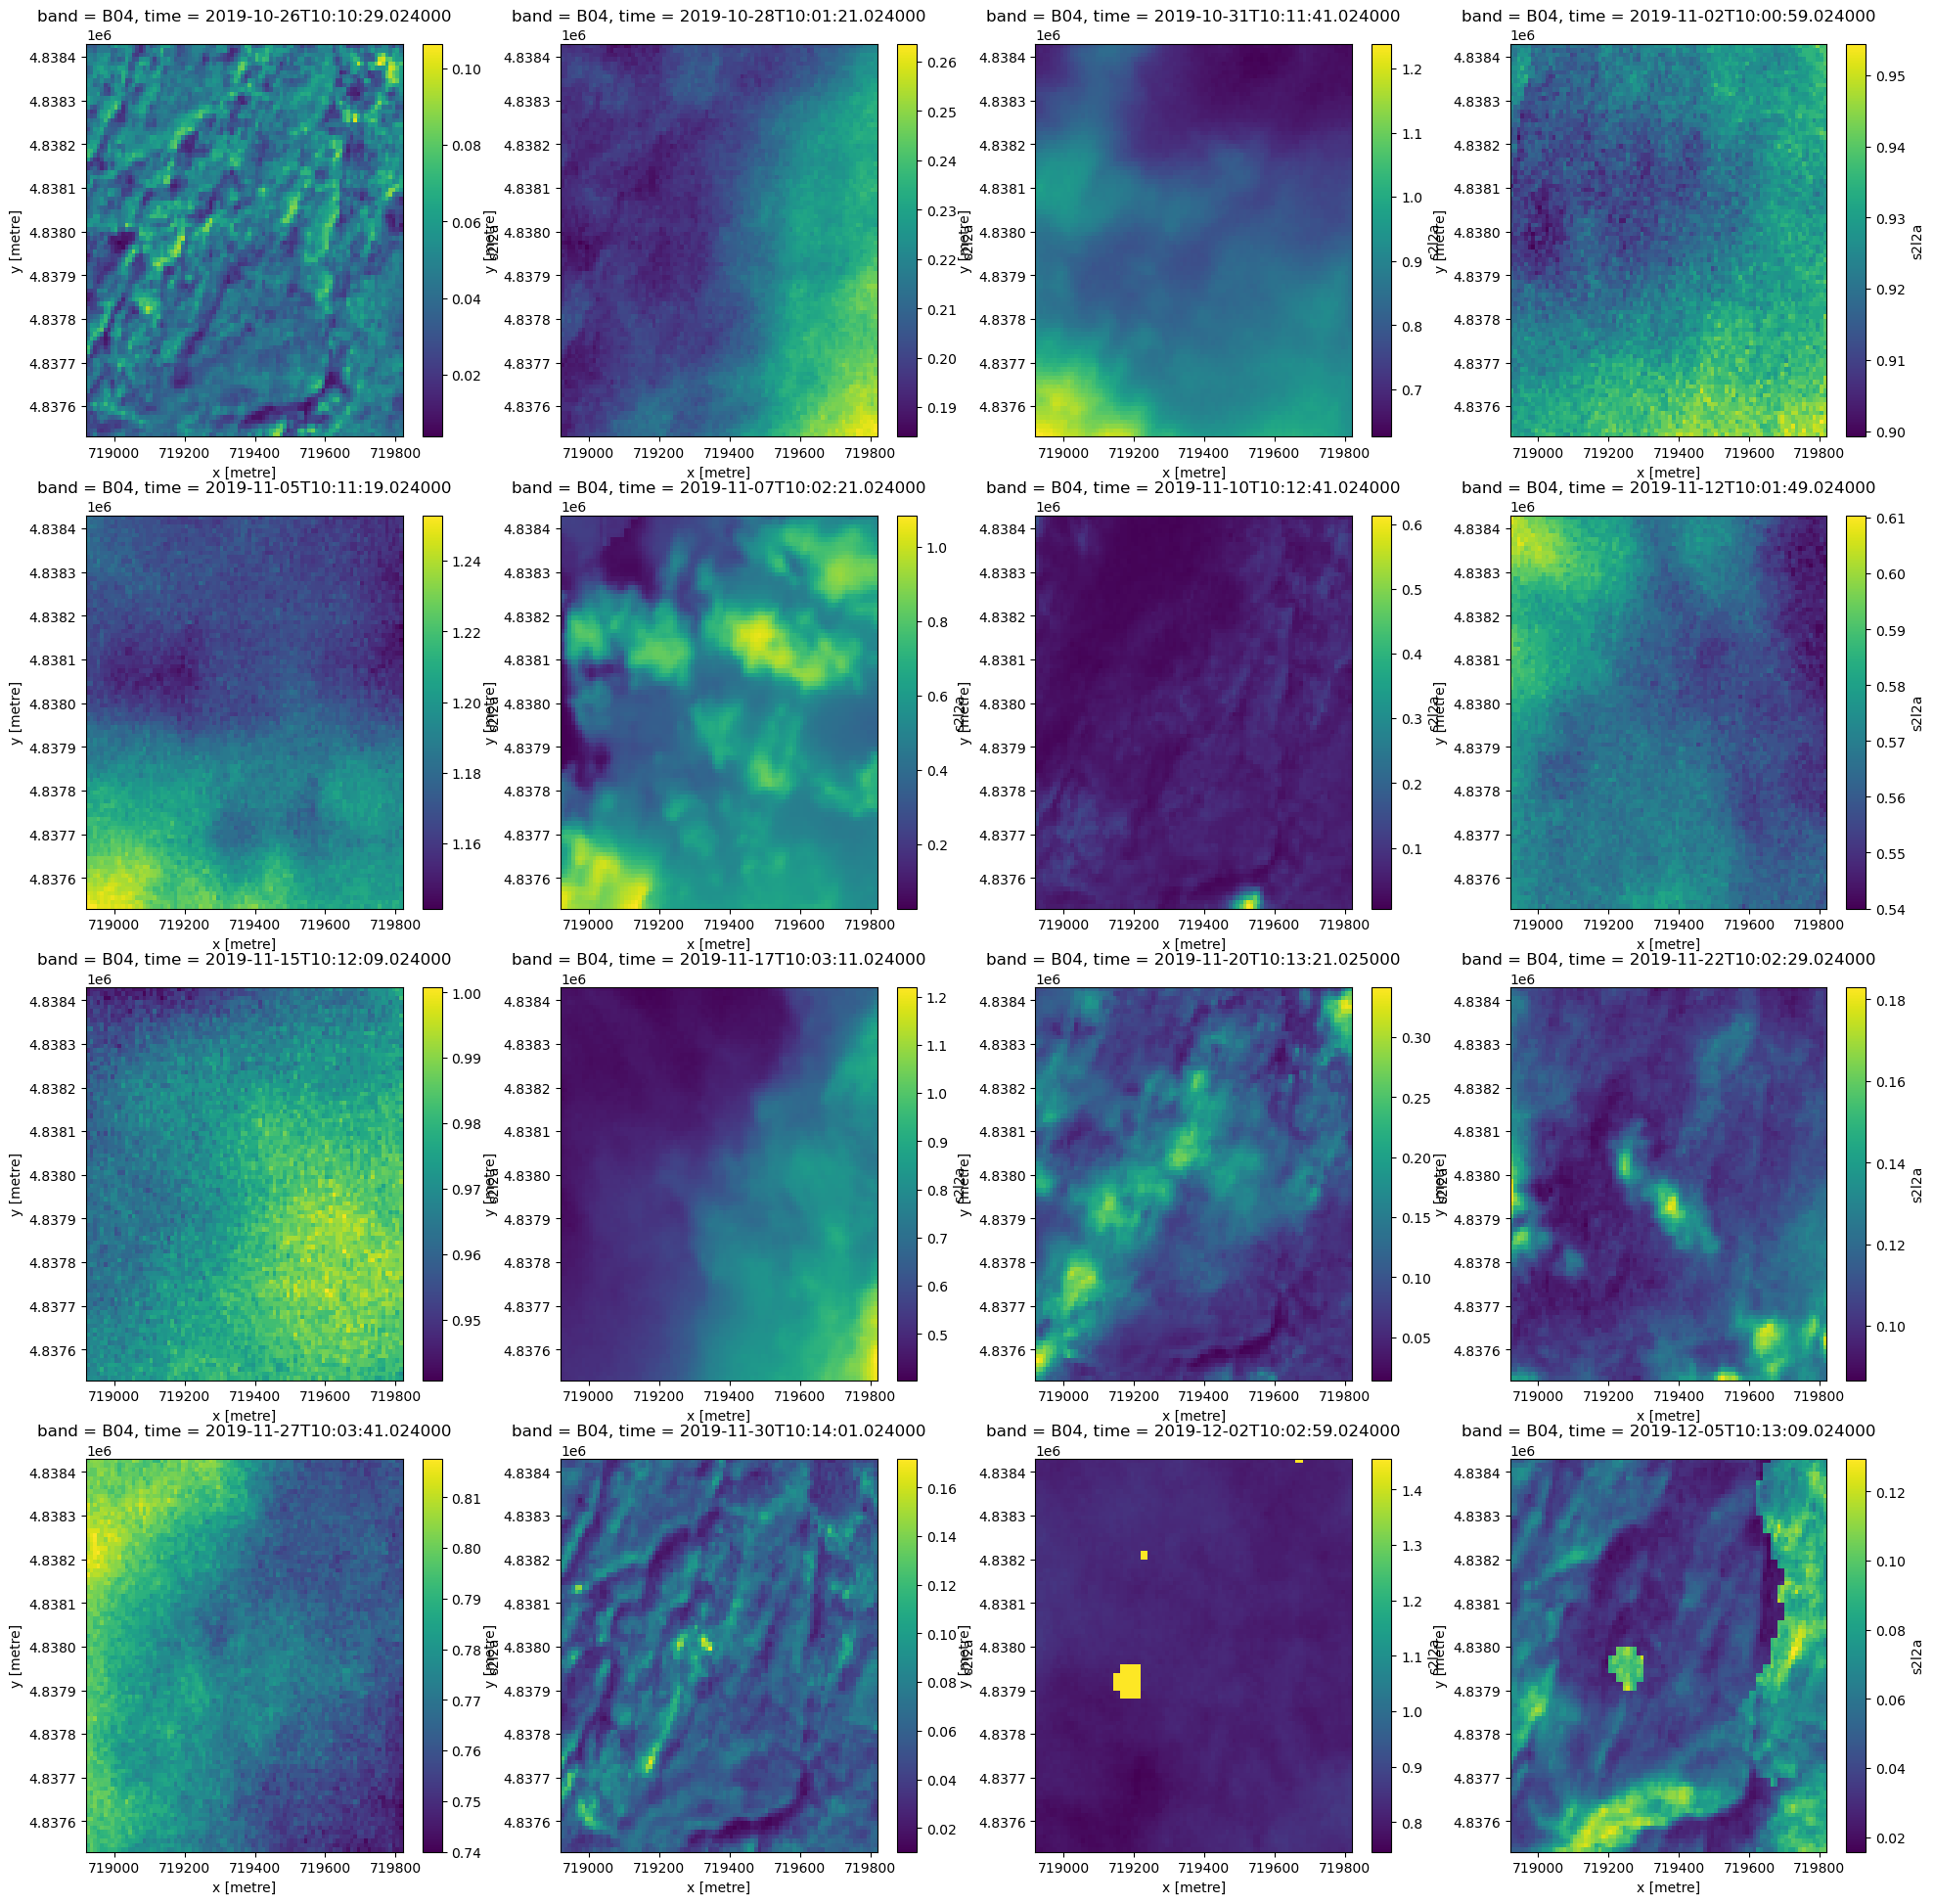

In [5]:
fig, _ax = plt.subplots(4, 4, figsize=(6*4, 6*4))
ax = _ax.flatten()
for i in range(16):
    ds.s2l2a.isel(time=i, band=3).plot(ax=ax[i])

In [6]:
cloud_mask_mask = MaskSet(ds.cloud_mask)
cmap, norm = cloud_mask_mask.get_cmap()
cloud_mask_mask

Flag name,Mask,Value
clear,None,0
thick_cloud,None,1
thin_cloud,None,2
cloud_shadow,None,3


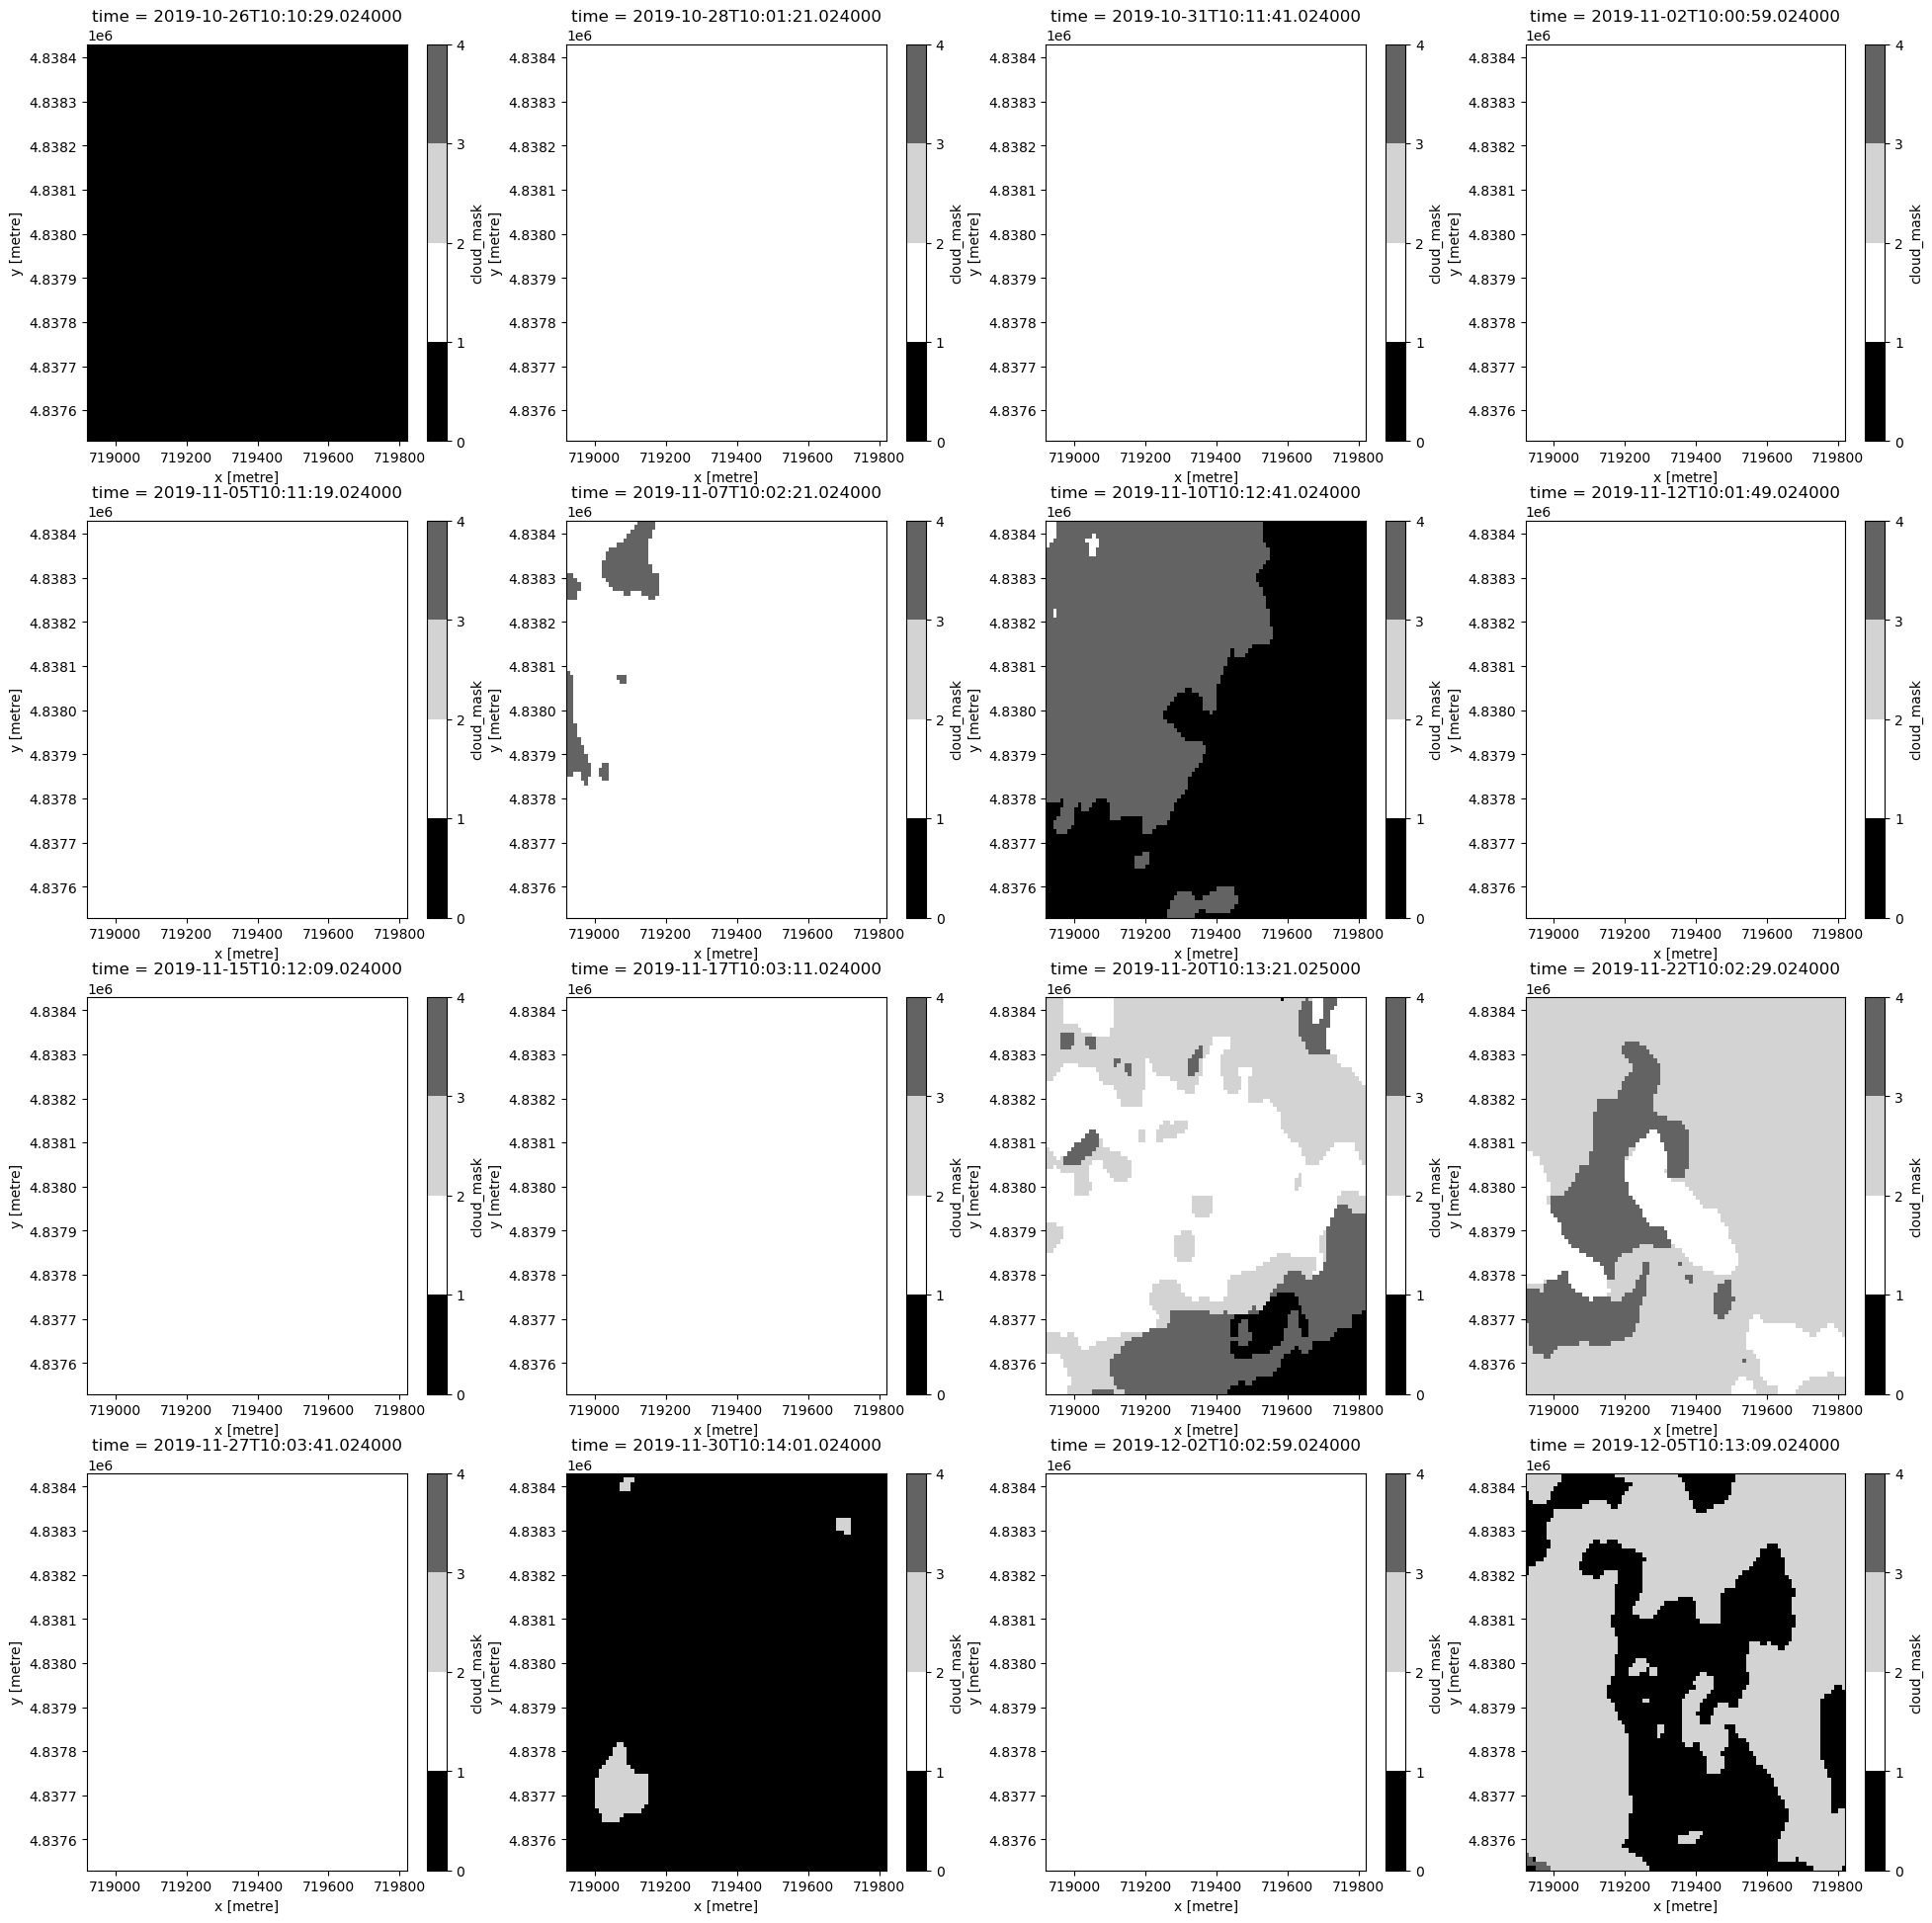

In [7]:
fig, _ax = plt.subplots(4, 4, figsize=(6*4, 6*4))
ax = _ax.flatten()
for i in range(16):
    ds.cloud_mask.isel(time=i).plot(ax=ax[i], cmap=cmap, norm=norm)

In [8]:
scl_mask = MaskSet(ds.scl)
cmap, norm = scl_mask.get_cmap()
scl_mask

Flag name,Mask,Value
no_data,None,0
saturated_or_defective_pixel,None,1
topographic_casted_shadows,None,2
cloud_shadows,None,3
vegetation,None,4
not_vegetation,None,5
water,None,6
unclassified,None,7
cloud_medium_probability,None,8
cloud_high_probability,None,9


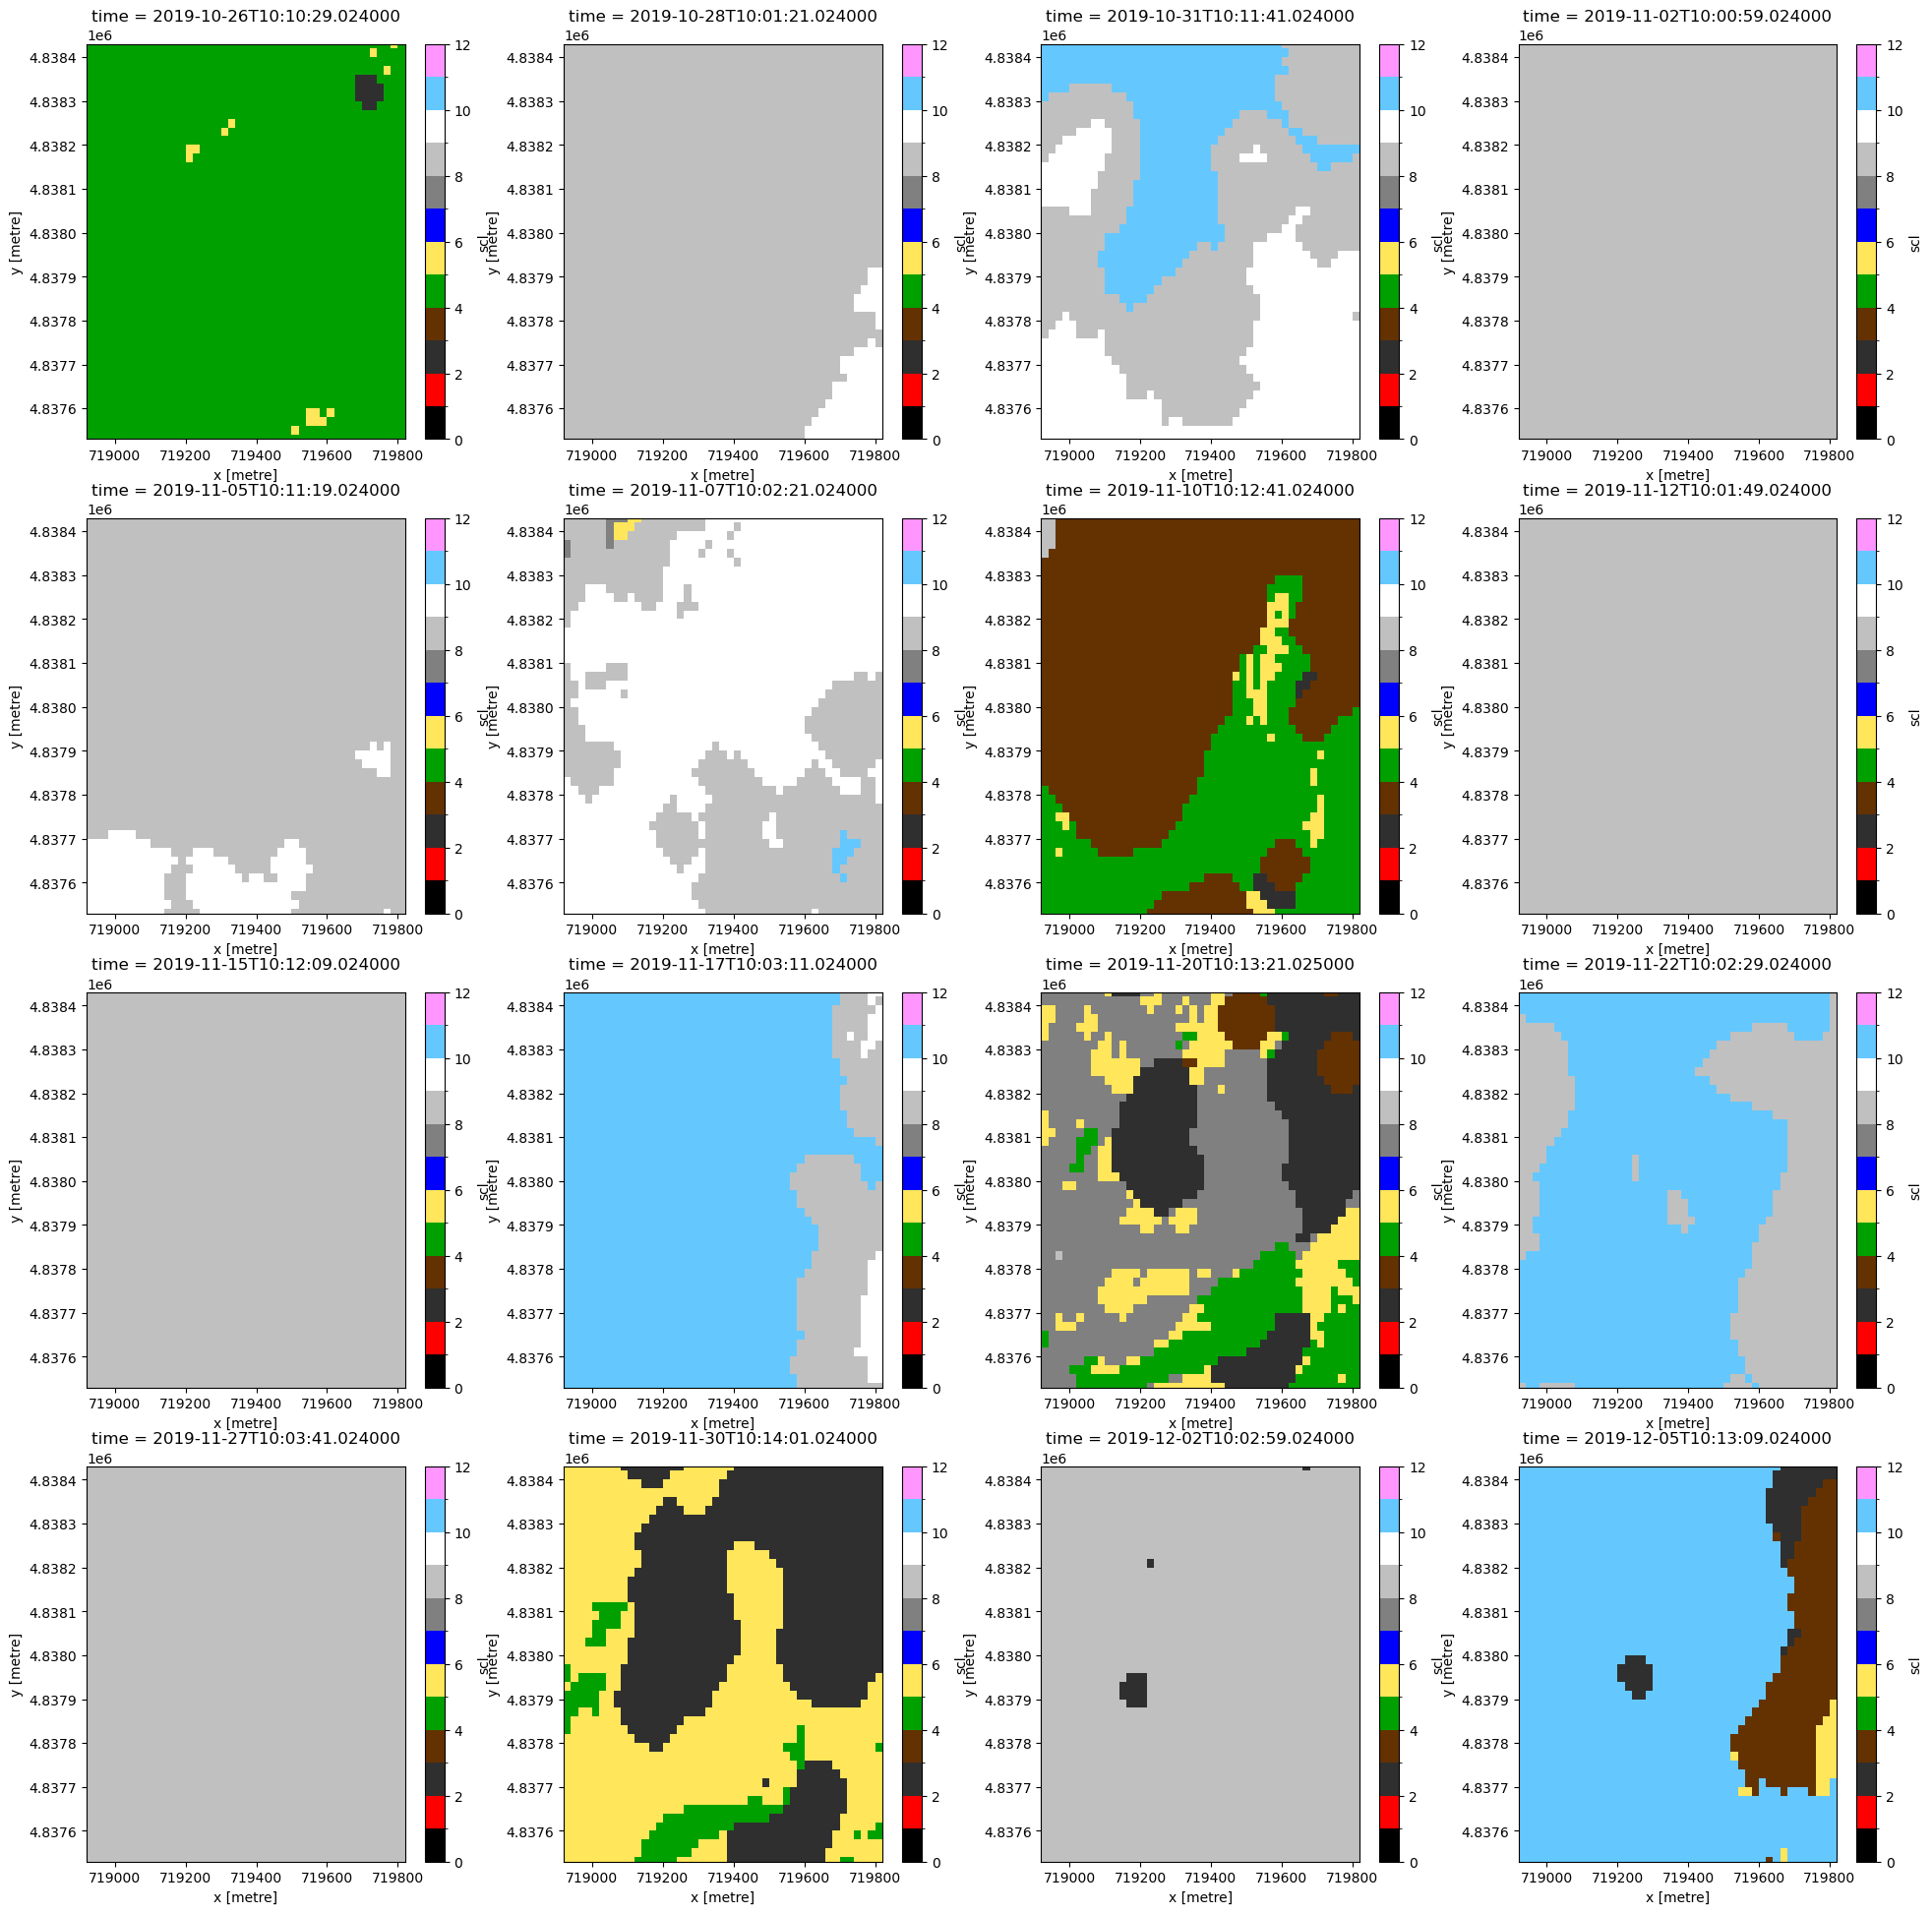

In [9]:
fig, _ax = plt.subplots(4, 4, figsize=(6*4, 6*4))
ax = _ax.flatten()
for i in range(16):
    ds.scl.isel(time=i).plot(ax=ax[i], cmap=cmap, norm=norm)

---
## 1. Science cube

In [10]:
ds = s3_store.open_data("cubes/science/0.0.2/000000.zarr")
ds

<xarray.Dataset> Size: 58GB
Dimensions:                   (angle: 2, angle_x: 2, angle_y: 2, band: 12,
                               time: 1153, y: 1000, x: 1000, time_era5: 2983,
                               time_esa_wc: 2, time_lccs: 7)
Coordinates:
  * angle                     (angle) <U7 56B 'Zenith' 'Azimuth'
  * angle_x                   (angle_x) float64 16B 5.967e+05 6.017e+05
  * angle_y                   (angle_y) float64 16B 5.66e+06 5.655e+06
  * band                      (band) <U5 240B 'B01' 'B02' 'B03' ... 'B11' 'B12'
  * time                      (time) datetime64[ns] 9kB 2016-11-01T10:32:02.0...
  * time_era5                 (time_era5) datetime64[ns] 24kB 2016-11-01 ... ...
  * time_esa_wc               (time_esa_wc) datetime64[ns] 16B 2020-01-01 202...
  * time_lccs                 (time_lccs) datetime64[ns] 56B 2016-01-01 ... 2...
  * x                         (x) float64 8kB 5.967e+05 5.967e+05 ... 6.067e+05
  * y                         (y) float64 8kB 5.665e+06 5.665e+06 ... 5.655e+06
Data variables: (12/113)
    cloud_mask                (time, y, x) uint8 1GB dask.array<chunksize=(20, 500, 500), meta=np.ndarray>
    dem                       (y, x) float32 4MB dask.array<chunksize=(500, 500), meta=np.ndarray>
    era5_d2m_max              (time_era5) float32 12kB dask.array<chunksize=(2983,), meta=np.ndarray>
    era5_d2m_mean             (time_era5) float32 12kB dask.array<chunksize=(2983,), meta=np.ndarray>
    era5_d2m_median           (time_era5) float32 12kB dask.array<chunksize=(2983,), meta=np.ndarray>
    era5_d2m_min              (time_era5) float32 12kB dask.array<chunksize=(2983,), meta=np.ndarray>
    ...                        ...
    lccs_processed_flag       (time_lccs, y, x) float32 28MB dask.array<chunksize=(7, 500, 500), meta=np.ndarray>
    s2l2a                     (band, time, y, x) float32 55GB dask.array<chunksize=(12, 20, 500, 500), meta=np.ndarray>
    scl                       (time, y, x) uint8 1GB dask.array<chunksize=(20, 500, 500), meta=np.ndarray>
    solar_angle               (time, angle, angle_y, angle_x) float32 37kB dask.array<chunksize=(1, 2, 2, 2), meta=np.ndarray>
    spatial_ref               int64 8B ...
    viewing_angle             (time, band, angle, angle_y, angle_x) float32 443kB dask.array<chunksize=(1, 12, 2, 2, 2), meta=np.ndarray>
Attributes: (12/36)
    acknowledgment:               DeepFeatures project
    affine_transform:             [10.0, 0.0, 596716.0, 0.0, -10.0, 5664658.0...
    bbox_utm:                     [596721, 5654663, 606711, 5664653]
    bbox_wgs84:                   [10.379465602333127, 51.035364882577994, 10...
    center_utm:                   [5659658.217015095, 601716.1995742661]
    center_wgs84:                 [51.079407, 10.452089]
    ...                           ...
    site_id:                      0
    time_range_end:               2024-12-31
    time_range_start:             2016-11-01
    utm_zone:                     32U
    version:                      0.0.2
    xcube_stac_attrs:             {'data_url': 'https://documentation.dataspa...

Check each data variable for nan values

In [11]:
for var in ds.data_vars:
    nan_count = ds[var].isnull().sum().compute().item()
    if nan_count > 0:
        print(f"Variable {var} has {nan_count} nans ({(nan_count / ds[var].size) * 100:.2f}%)")

Variable s2l2a has 23614 nans (0.00%)


In [ ]:
fig, _ax = plt.subplots(4, 4, figsize=(6*4, 6*4))
ax = _ax.flatten()
for i in range(16):
    ds.s2l2a.isel(time=i, band=3).plot(ax=ax[i], vmin=0., vmax=0.3)

In [ ]:
scl = ds.scl.isel(time=0)
scl_mask = MaskSet(scl)
scl_mask

In [ ]:
fig, _ax = plt.subplots(4, 4, figsize=(6*4, 6*4))
ax = _ax.flatten()
for i in range(16):
    ds.scl.isel(time=i).plot(ax=ax[i], cmap=cmap, norm=norm)

In [ ]:
ds.dem.plot()

In [ ]:
land_cover_mask = MaskSet(ds.lccs_class)
land_cover_mask

In [ ]:
cmap, norm = land_cover_mask.get_cmap()
fig, _ax = plt.subplots(2, 4, figsize=(6*4, 6*2))
ax = _ax.flatten()
for i in range(7):
    ds.lccs_class.isel(time_lccs=i).plot(ax=ax[i], cmap=cmap, norm=norm)

In [ ]:
esa_wc_mask = MaskSet(ds.esa_wc)
cmap, norm = esa_wc_mask.get_cmap()
esa_wc_mask

In [ ]:
fig, _ax = plt.subplots(1, 2, figsize=(6*2, 6*1))
ax = _ax.flatten()
for i in range(2):
    ds.esa_wc.isel(time_esa_wc=i).plot(ax=ax[i], cmap=cmap, norm=norm)

In [ ]:
fig, _ax = plt.subplots(20, 5, figsize=(6*5, 6*20))
ax = _ax.flatten()
era5_vars = [var for var in ds.data_vars if "era5" in var]
for i, var in enumerate(era5_vars):
    ds[var].plot(ax=ax[i])
    ax[i].set_title(var)

---
## 2. Science Cube

In [ ]:
ds = s3_store.open_data("cubes/science/0.0.1/1.zarr")
ds

In [ ]:
time = ds.time.diff(dim="time") / 1e9 / 3600 / 24
time.plot()

In [ ]:
ds.s2l2a.isel(band=4, time=0).plot()

In [ ]:
scl = ds.scl.isel(time=0)
scl_mask = MaskSet(scl)
scl_mask

In [ ]:
cmap, norm = scl_mask.get_cmap()
scl.plot(cmap=cmap, norm=norm)

In [ ]:
land_cover_2019 = ds.lccs_class.isel(time_lccs=4)
land_cover_mask = MaskSet(land_cover_2019)
land_cover_mask

In [ ]:
cmap, norm = land_cover_mask.get_cmap()
land_cover_2019.plot(cmap=cmap, norm=norm)

In [ ]:
fig, ax = plt.subplots()
ds.era5_t2m_max.plot(ax=ax, label="max")
ds.era5_t2m_mean.plot(ax=ax, label="mean")
ds.era5_t2m_min.plot(ax=ax, label="min")
ax.legend()

In [ ]:
vars = []
for var in list(ds.keys()):
    if "era5" in var:
        vars.append("_".join(var.split("_")[1:-1]))
vars = np.unique(vars)
vars

In [ ]:
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
_ax = ax.flatten()
for i, var in enumerate(vars):
    if var == "tp":
        ds[f"era5_{var}_sum"].plot(ax=_ax[i], label=f"era5_{var}_sum")
    else:
        ds[f"era5_{var}_min"].plot(ax=_ax[i], label=f"era5_{var}_min")
        ds[f"era5_{var}_mean"].plot(ax=_ax[i], label=f"era5_{var}_mean")
        ds[f"era5_{var}_max"].plot(ax=_ax[i], label=f"era5_{var}_max")
    _ax[i].legend()

In [ ]:
isnull = ds.isnull().compute()
for key in list(ds.keys()):
    if "era5_" in key:
        null_times = ds[key][isnull[key]].time_era5
        if null_times.size > 0:
            print(null_times)